# *Projet analyse donn√©es*

# sujet : Analyse l'imapct des indicateurs √©ducatifs de API word bank sur croissance √©conomique

In [15]:
import requests
import pandas as pd
from functools import reduce
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Liste des indicateurs avec leurs codes dans l'API de la Banque mondiale
indicators = {
    'Primary Enrollment Rate': 'SE.PRM.ENRR', # Taux d'inscription √† l'√©cole primaire
    'Secondary Enrollment Rate': 'SE.SEC.ENRR', # Taux d'inscription √† l'√©cole secondaire
    'Tertiary Enrollment Rate': 'SE.TER.ENRR', # Taux d'inscription √† l'enseignement sup√©rieur
    'Completion Rate (Primary)': 'SE.PRM.CMPT.ZS', # Taux d'ach√®vement du cycle primaire
    'Completion Rate (Secondary)': 'SE.SEC.CMPT.LO.ZS', # Taux d'ach√®vement du cycle secondaire
    'Completion Rate (Tertiary)': 'SE.TER.CMPT.ZS', # Taux d'ach√®vement de l'enseignement sup√©rieur
    'Public Education Expenditure (% of GDP)': 'SE.XPD.TOTL.GD.ZS',
    'Private Education Expenditure': 'SE.XPD.PRIM.PC.ZS',  # D√©penses priv√©es en √©ducation
    'Expenditure per Student (Primary)': 'SE.XPD.PRIM.PC.ZS',
    'Expenditure per Student (Secondary)': 'SE.XPD.SECO.PC.ZS',
    'Expenditure per Student (Tertiary)': 'SE.XPD.TERT.PC.ZS',
    'GDP per Capita': 'NY.GDP.PCAP.CD',
    'Economic Growth Rate': 'NY.GDP.MKTP.KD.ZG',
    'Unemployment Rate': 'SL.UEM.TOTL.ZS',
    'Literacy Rate': 'SE.ADT.LITR.ZS',
    'Life Expectancy': 'SP.DYN.LE00.IN',
    'Poverty Rate': 'SI.POV.DDAY'
}

# Fonction pour r√©cup√©rer les donn√©es d'un indicateur
def get_indicator_data(indicator_code):
    url = f"https://api.worldbank.org/v2/country/all/indicator/{indicator_code}?format=json&per_page=10000&date={2017}"
    response = requests.get(url)
    data = response.json()

    # V√©rification de la r√©ponse et extraction des donn√©es
    if len(data) > 1 and isinstance(data[1], list):
        df = pd.DataFrame(data[1])
        if {'country', 'countryiso3code', 'date', 'value'}.issubset(df.columns):
            df = df[['country', 'countryiso3code', 'date', 'value']].rename(
                columns={'country': 'Country', 'countryiso3code': 'Country_Code', 'date': 'Year', 'value': indicator_code}
            )
            
            # Simplification de la colonne "Country" et suppression de la colonne "Year"
            df['Country'] = df['Country'].apply(lambda x: x if isinstance(x, str) else str(x))
            df['Country_Code'] = df['Country_Code'].apply(lambda x: x if isinstance(x, str) else str(x))
            df = df.drop(columns=['Year'])  # Retirer la colonne Year, puisque vous avez fix√© l'ann√©e √† 2017
            return df
    print(f"No data found for {indicator_code}")
    return pd.DataFrame()

# R√©cup√©ration des donn√©es pour chaque indicateur
data_frames = []
for indicator_name, indicator_code in indicators.items():
    print(f"Fetching data for {indicator_name} ({indicator_code})...")
    df = get_indicator_data(indicator_code)
    if not df.empty:
        data_frames.append(df)

# Fusion des DataFrames
def fusionner_dfs(left, right):
    return pd.merge(left, right, on=['Country', 'Country_Code'], how='outer')

if data_frames:
    # R√©duire les DataFrames pour effectuer la fusion
    final_data = reduce(fusionner_dfs, data_frames)
    print("Fusion r√©ussie.")

    # Afficher les 10 premi√®res lignes des donn√©es
    print("Aper√ßu des donn√©es :")
    print(final_data.head(10))

    # Exporter les donn√©es fusionn√©es dans un fichier CSV
    final_data.to_csv("education_economics_indicators2017.csv", index=False)
    print("Les donn√©es ont √©t√© enregistr√©es dans 'education_economics_indicators.csv'")
else:
    print("Aucune donn√©e n'a √©t√© r√©cup√©r√©e.")


Fetching data for Primary Enrollment Rate (SE.PRM.ENRR)...
Fetching data for Secondary Enrollment Rate (SE.SEC.ENRR)...
Fetching data for Tertiary Enrollment Rate (SE.TER.ENRR)...
Fetching data for Completion Rate (Primary) (SE.PRM.CMPT.ZS)...
Fetching data for Completion Rate (Secondary) (SE.SEC.CMPT.LO.ZS)...
Fetching data for Completion Rate (Tertiary) (SE.TER.CMPT.ZS)...
No data found for SE.TER.CMPT.ZS
Fetching data for Public Education Expenditure (% of GDP) (SE.XPD.TOTL.GD.ZS)...
Fetching data for Private Education Expenditure (SE.XPD.PRIM.PC.ZS)...
Fetching data for Expenditure per Student (Primary) (SE.XPD.PRIM.PC.ZS)...
Fetching data for Expenditure per Student (Secondary) (SE.XPD.SECO.PC.ZS)...
Fetching data for Expenditure per Student (Tertiary) (SE.XPD.TERT.PC.ZS)...
Fetching data for GDP per Capita (NY.GDP.PCAP.CD)...
Fetching data for Economic Growth Rate (NY.GDP.MKTP.KD.ZG)...
Fetching data for Unemployment Rate (SL.UEM.TOTL.ZS)...
Fetching data for Literacy Rate (SE.AD

In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              266 non-null    object 
 1   Country_Code         266 non-null    object 
 2   SE.PRM.ENRR          217 non-null    float64
 3   SE.SEC.ENRR          187 non-null    float64
 4   SE.TER.ENRR          188 non-null    float64
 5   SE.PRM.CMPT.ZS       180 non-null    float64
 6   SE.SEC.CMPT.LO.ZS    181 non-null    float64
 7   SE.XPD.TOTL.GD.ZS    216 non-null    float64
 8   SE.XPD.PRIM.PC.ZS_x  39 non-null     float64
 9   SE.XPD.PRIM.PC.ZS_y  39 non-null     float64
 10  SE.XPD.SECO.PC.ZS    36 non-null     float64
 11  SE.XPD.TERT.PC.ZS    38 non-null     float64
 12  NY.GDP.PCAP.CD       258 non-null    float64
 13  NY.GDP.MKTP.KD.ZG    257 non-null    float64
 14  SL.UEM.TOTL.ZS       235 non-null    float64
 15  SE.ADT.LITR.ZS       79 non-null     flo

# Nettoyage de Donn√©es 

Ce code nettoie et pr√©pare un jeu de donn√©es contenant des indicateurs socio-√©conomiques et √©ducatifs. Il √©limine les colonnes redondantes, g√®re les valeurs manquantes en supprimant celles d√©passant un seuil ou en les rempla√ßant par des moyennes, et extrait les noms de pays d'une colonne encod√©e. Enfin, il supprime les doubles pour garantir des donn√©es fiables et pr√™tes √† l'analyse.

In [19]:
import pandas as pd
import ast

# Fonction pour nettoyer la colonne "Country"
def extract_country_name(value):
    try:
        # Convertir la cha√Æne en dictionnaire et extraire le nom du pays
        parsed = ast.literal_eval(value)
        return parsed.get('value') if isinstance(parsed, dict) else value
    except (ValueError, SyntaxError):
        return value

# Charger le dataset
data = pd.read_csv("education_economics_indicators2017.csv")

# √âtape 1: Supprimer les colonnes en double
data_cleaned = data.drop(columns=['SE.XPD.PRIM.PC.ZS_y'], errors='ignore')

# √âtape 2: Nettoyer la colonne "Country"
data_cleaned['Country'] = data_cleaned['Country'].apply(extract_country_name)

# √âtape 3: G√©rer les valeurs manquantes
# Supprimer les colonnes avec plus de 85% de valeurs manquantes
threshold = 0.85 * len(data_cleaned)
data_cleaned = data_cleaned.loc[:, data_cleaned.isnull().sum() < threshold]

# Supprimer les lignes o√π "Country_Code" est manquant (optionnel : ou remplacer par 'Unknown')
data_cleaned = data_cleaned.dropna(subset=['Country_Code'])

# Remplir les valeurs manquantes dans les autres colonnes avec la moyenne
for column in data_cleaned.select_dtypes(include=['float64']).columns:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mean())

# √âtape 4: V√©rifier et supprimer les doublons
data_cleaned = data_cleaned.drop_duplicates()

# Sauvegarder le fichier nettoy√© (optionnel)
data_cleaned.to_csv("cleaned_data.csv", index=False)


#  Transformation de donn√©es 

Ce code applique une normalisation standardis√©e sur des indicateurs socio-√©conomiques et √©ducatifs pour uniformiser les √©chelles des variables. Il renomme ensuite les colonnes avec des noms descriptifs pour am√©liorer la lisibilit√© et faciliter l'analyse ult√©rieure. Enfin, les donn√©es transform√©es et renomm√©es sont export√©es dans un nouveau fichier CSV pr√™t pour une exp.

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Charger les donn√©es nettoy√©es
df = pd.read_csv("cleaned_data.csv")

def transform_data(df):
    
    # 3. Normalisation des variables num√©riques
    # Liste des colonnes √† normaliser
    columns_to_normalize = [
        'SE.PRM.ENRR', 'SE.SEC.ENRR', 'SE.TER.ENRR',
        'SE.PRM.CMPT.ZS', 'SE.SEC.CMPT.LO.ZS', 
        'SE.XPD.TOTL.GD.ZS', 
        'NY.GDP.PCAP.CD', 'NY.GDP.MKTP.KD.ZG',
        'SL.UEM.TOTL.ZS', 'SE.ADT.LITR.ZS', 'SP.DYN.LE00.IN', 'SI.POV.DDAY'
    ]
    
    # Normalisation Min-Max
    scaler = StandardScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    
    return df

# Appliquer la transformation des donn√©es
df_transformed = transform_data(df)


# Renommage des colonnes pour qu'elles soient plus compr√©hensibles
df_transformed.rename(columns={
    'Country': 'Country Name',    
    'Country_Code': 'Country ISO Code',    
    'SE.PRM.ENRR': 'Primary Enrollment Rate (%)',     
    'SE.SEC.ENRR': 'Secondary Enrollment Rate (%)',   
    'SE.TER.ENRR': 'Tertiary Enrollment Rate (%)',    
    'SE.PRM.CMPT.ZS': 'Primary Completion Rate (%)', 
    'SE.SEC.CMPT.LO.ZS': 'Secondary Completion Rate (%)',
    'SE.XPD.TOTL.GD.ZS': 'Public Education Expenditure (% of GDP)', 
    'NY.GDP.PCAP.CD': 'GDP per Capita (USD)', 
    'NY.GDP.MKTP.KD.ZG': 'Economic Growth Rate (%)', 
    'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)', 
    'SE.ADT.LITR.ZS': 'Literacy Rate (%)', 
    'SP.DYN.LE00.IN': 'Life Expectancy (Years)', 
    'SI.POV.DDAY': 'Poverty Rate (%)' 
}, inplace=True)

# V√©rification du r√©sultat
print("Aper√ßu des donn√©es apr√®s transformation, normalisation et renommage :")
print(df_transformed.head())

# Exporter les donn√©es transform√©es et renomm√©es dans un nouveau fichier CSV
df_transformed.to_csv("education_economics_indicators_transformed.csv", index=False)
print("Les donn√©es transform√©es, normalis√©es et renomm√©es ont √©t√© enregistr√©es dans 'education_economics_indicators_transformed.csv'")


Aper√ßu des donn√©es apr√®s transformation, normalisation et renommage :
                                    Country Name Country ISO Code  \
0                                     Arab World              ARB   
1                                          World              WLD   
2    East Asia & Pacific (excluding high income)              EAP   
3  Europe & Central Asia (excluding high income)              ECA   
4                                     South Asia              SAS   

   Primary Enrollment Rate (%)  Secondary Enrollment Rate (%)  \
0                    -1.114646                      -0.727716   
1                     0.077583                      -0.436792   
2                    -0.072907                       0.006715   
3                    -0.436667                       0.681330   
4                     0.879998                      -0.762287   

   Tertiary Enrollment Rate (%)  Primary Completion Rate (%)  \
0                     -0.544085                    -0.826

# Etude de corr√©lation : 

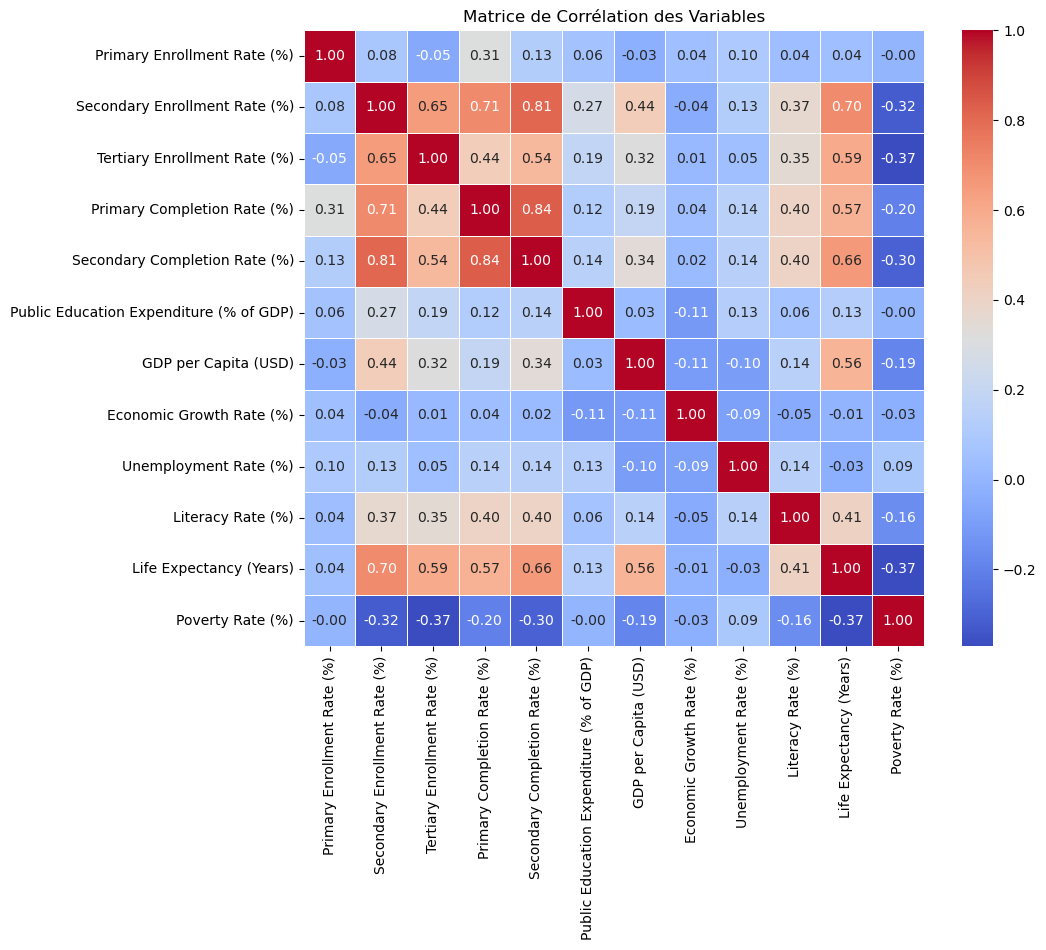

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les donn√©es transform√©es
df = pd.read_csv("education_economics_indicators_transformed.csv")

# Filtrer uniquement les colonnes num√©riques
df_numeric = df.select_dtypes(include=['number'])

# Calcul de la matrice de corr√©lation
correlation_matrix = df_numeric.corr()

# Affichage de la matrice de corr√©lation sous forme de carte thermique
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corr√©lation des Variables')
plt.show()


Les taux d'inscription (Primary, Secondary, Tertiary) et de compl√©tion scolaire sont fortement corr√©l√©s entre eux (corr√©lations > 0.7), indiquant une coh√©rence dans l'acc√®s √† l'√©ducation.
La d√©pense publique en √©ducation (% du PIB) est faiblement corr√©l√©e √† la majorit√© des variables, sugg√©rant une relation limit√©e avec les indicateurs √©ducatifs ou √©conomiques.
Le taux d'alphab√©tisation et l'esp√©rance de vie sont mod√©r√©ment li√©s au taux d'inscription tertiaire (corr√©lations ~0.6), soulignant leur r√¥le dans le d√©veloppement humain.
Le taux de pauvret√© a une corr√©lation n√©gative avec plusieurs indicateurs √©ducatifs et √©conomiques, indiquant un lien entre pauvret√© et faible d√©veloppement √©ducatif.

#### R√©gression multiple

Ce code effectue une analyse de r√©gression multiple pour analyser l'effet des taux d'ach√®vement et d'inscription scolaire sur le PIB par habitant.

In [70]:
# Importer les biblioth√®ques
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Charger les donn√©es

data = pd.read_csv('education_economics_indicators_transformed.csv')

# Variables pour la r√©gression multiple
X = data[["Secondary Completion Rate (%)", "Secondary Enrollment Rate (%)", "Tertiary Enrollment Rate (%)"]]
y = data["GDP per Capita (USD)"]

# Diviser les donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mod√®le de r√©gression multiple
lr = LinearRegression()
lr.fit(X_train, y_train)




LinearRegression()

Ce code visualise en 3D la relation entre le taux d'ach√®vement secondaire, le taux d'inscription secondaire et le PIB par habitant en repr√©sentant les donn√©es r√©elles sous forme de nuage de points et le plan de r√©gression correspondant g√©n√©r√© par le mod√®le de r√©gression multiple.

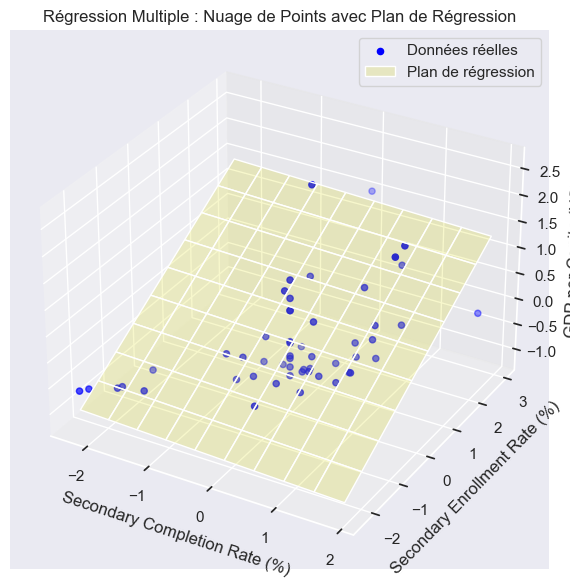

In [72]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Pr√©parer les donn√©es pour le graphique 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Donn√©es r√©elles (nuage de points)
ax.scatter(
    X_test["Secondary Completion Rate (%)"],
    X_test["Secondary Enrollment Rate (%)"],
    y_test,
    color='blue',
    label='Donn√©es r√©elles'
)

# Cr√©er un maillage pour le plan de r√©gression
x1 = np.linspace(X_test["Secondary Completion Rate (%)"].min(), X_test["Secondary Completion Rate (%)"].max(), 10)
x2 = np.linspace(X_test["Secondary Enrollment Rate (%)"].min(), X_test["Secondary Enrollment Rate (%)"].max(), 10)
x1, x2 = np.meshgrid(x1, x2)
x1_flat, x2_flat = x1.ravel(), x2.ravel()

# Ajouter les pr√©dictions du mod√®le sur le maillage
x3_pred = lr.intercept_ + lr.coef_[0] * x1_flat + lr.coef_[1] * x2_flat + lr.coef_[2] * np.mean(X_test["Tertiary Enrollment Rate (%)"])
x3_pred = x3_pred.reshape(x1.shape)

# Ajouter le plan de r√©gression
ax.plot_surface(x1, x2, x3_pred, color='yellow', alpha=0.2, label='Plan de r√©gression')

# Configurer les axes
ax.set_title("R√©gression Multiple : Nuage de Points avec Plan de R√©gression")
ax.set_xlabel("Secondary Completion Rate (%)")
ax.set_ylabel("Secondary Enrollment Rate (%)")
ax.set_zlabel("GDP per Capita (USD)")

# Ajouter une l√©gende
plt.legend(["Donn√©es r√©elles", "Plan de r√©gression"], loc="best")
plt.show()


#### Interpr√©tation :
Nuage de points :

Les points bleus montrent comment les valeurs r√©elles de GDP per Capita se r√©partissent en fonction des deux variables explicatives (Secondary Completion Rate et Secondary Enrollment Rate).
Les donn√©es semblent dispers√©es, ce qui pourrait indiquer une faible corr√©lation entre ces deux variables explicatives et le PIB par habitant.

#### Plan de r√©gression :

Le plan jaune repr√©sente le mod√®le de r√©gression multiple ajust√© aux donn√©es.
Il montre la relation lin√©aire pr√©dite par le mod√®le entre les variables explicatives et la variable cible.
La faible proximit√© entre plusieurs points et le plan sugg√®re que le mod√®le pourrait ne pas capturer parfaitement la variance du PIB par habitant.
#### conclusion 
Le mod√®le de r√©gression multiple semble avoir des limites pour expliquer la variabilit√© du PIB par habitant uniquement √† partir du taux d'ach√®vement et du taux d'inscription secondaire. 
Donc ces deux variables n ont pas d effet sur PIB .

In [74]:
# Pr√©dictions et √©valuation
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R√©gression multiple :")
print(f"R¬≤ (test) : {r2:.2f}")

R√©gression multiple :
R¬≤ (test) : 0.27


avec un coefficient de d√©termination ùëÖ^2=0.27 , cela signifie que le mod√®le de r√©gression multiple explique seulement 27 % de la variance du PIB par habitant
√† partir des variables explicatives Secondary Enrollment Rate (%) et Secondary Completion Rate (%) 

#### le test de Kruskal-Wallis



Cette partie  pr√©sente une analyse statistique visant √† examiner les diff√©rences de GDP per Capita (USD) entre plusieurs cat√©gories d'Expenditure_Category. Le test de Kruskal-Wallis a √©t√© utilis√© pour v√©rifier si des diff√©rences significatives existent entre les groupes. Ce test non param√©trique est adapt√© aux donn√©es qui ne suivent pas une distribution normale.

In [27]:
import pandas as pd

# Charger les donn√©es
data = pd.read_csv("education_economics_indicators_transformed.csv")

# Transformer la variable des d√©penses publiques en √©ducation en cat√©gories (quantiles)
data['Expenditure_Category'] = pd.qcut(
    data['Public Education Expenditure (% of GDP)'], 
    q=3,  # Diviser en 3 quantiles
    labels=['Low', 'Medium', 'High']  # √âtiquettes des cat√©gories
)

# Enregistrer les donn√©es modifi√©es dans un nouveau fichier CSV
output_file_path = "education_economics_indicators_transformed_with_categoriesj.csv"
data.to_csv(output_file_path, index=False)

print(f"Le fichier a √©t√© enregistr√© sous : {output_file_path}")


Le fichier a √©t√© enregistr√© sous : education_economics_indicators_transformed_with_categoriesj.csv


In [29]:
import pandas as pd
from scipy import stats
from scipy.stats import kruskal
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt



# Charger les donn√©es depuis un fichier CSV
# Remplacez 'votre_fichier.csv' par le chemin r√©el de votre fichier CSV
data = pd.read_csv('education_economics_indicators_transformed_with_categoriesj.csv')

# Afficher les premi√®res lignes pour voir les donn√©es
# S√©lectionner uniquement les colonnes num√©riques
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Appliquer le test de Shapiro-Wilk √† chaque colonne num√©rique
for col in numerical_cols:
    # Effectuer le test de Shapiro-Wilk
    stat, p_value = stats.shapiro(data[col])
    print(f"Test de Shapiro-Wilk pour la colonne '{col}': Stat={stat}, p-value={p_value}")
    
    # Interpr√©ter le r√©sultat
    if p_value > 0.05:
        print(f"La colonne '{col}' suit une distribution normale.")
    else:
        print(f"La colonne '{col}' ne suit pas une distribution normale.")
    print("-" * 50)


Test de Shapiro-Wilk pour la colonne 'Primary Enrollment Rate (%)': Stat=0.8523964949610052, p-value=4.4946459133998474e-15
La colonne 'Primary Enrollment Rate (%)' ne suit pas une distribution normale.
--------------------------------------------------
Test de Shapiro-Wilk pour la colonne 'Secondary Enrollment Rate (%)': Stat=0.9247940761696637, p-value=3.1920703794703525e-10
La colonne 'Secondary Enrollment Rate (%)' ne suit pas une distribution normale.
--------------------------------------------------
Test de Shapiro-Wilk pour la colonne 'Tertiary Enrollment Rate (%)': Stat=0.9454085363013278, p-value=2.7594022564774513e-08
La colonne 'Tertiary Enrollment Rate (%)' ne suit pas une distribution normale.
--------------------------------------------------
Test de Shapiro-Wilk pour la colonne 'Primary Completion Rate (%)': Stat=0.8556665922751474, p-value=6.773651045492056e-15
La colonne 'Primary Completion Rate (%)' ne suit pas une distribution normale.
------------------------------

In [31]:
data = pd.read_csv('education_economics_indicators_transformed_with_categoriesj.csv')
data.head()

Country Name Country ISO Code  \
0                                     Arab World              ARB   
1                                          World              WLD   
2    East Asia & Pacific (excluding high income)              EAP   
3  Europe & Central Asia (excluding high income)              ECA   
4                                     South Asia              SAS   

   Primary Enrollment Rate (%)  Secondary Enrollment Rate (%)  \
0                    -1.114646                      -0.727716   
1                     0.077583                      -0.436792   
2                    -0.072907                       0.006715   
3                    -0.436667                       0.681330   
4                     0.879998                      -0.762287   

   Tertiary Enrollment Rate (%)  Primary Completion Rate (%)  \
0                     -0.544085                    -0.826542   
1                     -0.259243                    -0.126460   
2                      0.020185                     0.582842   
3                      0.982530                     0.411355   
4                     -0.865859                     0.117390   

   Secondary Completion Rate (%)  Public Education Expenditure (% of GDP)  \
0                      -0.754123                             1.215476e-15   
1                      -0.198609                            -6.056073e-02   
2                       0.551908                            -5.688887e-01   
3                       0.832842                            -1.754877e-01   
4                      -0.045359                            -8.295493e-01   

   GDP per Capita (USD)  Economic Growth Rate (%)  Unemployment Rate (%)  \
0             -0.441295                 -0.466670               0.739246   
1             -0.245802                  0.033656              -0.325281   
2             -0.394654                  0.885542              -0.730149   
3             -0.436893                  0.654203               0.264108   
4             -0.612143                  0.831068              -0.116051   

   Literacy Rate (%)  Life Expectancy (Years)  Poverty Rate (%)  \
0          -0.816148                -0.123942          0.000000   
1           0.567351                 0.035039          1.168492   
2           1.655968                 0.424914          0.000000   
3           2.008644                 0.223978          0.000000   
4          -1.110357                -0.307205          1.859622   

  Expenditure_Category  
0               Medium  
1               Medium  
2                  Low  
3               Medium  
4                  Low

Hypoth√®ses du test de Kruskal-Wallis

- Hypoth√®se nulle (H‚ÇÄ) : Les m√©dianes des groupes sont √©gales. Autrement dit, il n'y a pas de diff√©rence significative entre les groupes.
- 
- Hypoth√®se alternative (H‚ÇÅ) : Au moins une des m√©dianes est diff√©rente des autres. Cela signifie qu'il existe une diff√©rence significative entre les groupes.

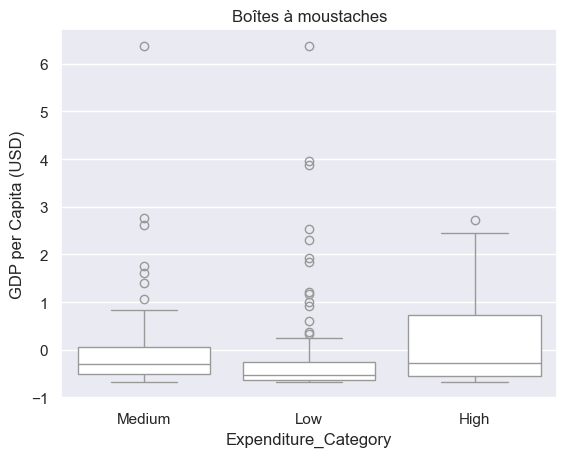

In [34]:
sns.set()
ax = sns.boxplot(x="Expenditure_Category", y="GDP per Capita (USD)", data=data, color='white')

plt.xlabel('Expenditure_Category')
plt.ylabel('GDP per Capita (USD)')
plt.title('Bo√Ætes √† moustaches')
plt.show()


Cette bo√Æte √† moustaches montre la r√©partition du PIB par habitant (en USD) en fonction de trois cat√©gories de d√©penses : Medium, Low, et High. 

1-Central Tendency (M√©dianes) :

Les m√©dianes diff√®rent selon les cat√©gories de d√©penses. Le PIB par habitant semble plus √©lev√© pour la cat√©gorie High que pour les cat√©gories Medium et Low, sugg√©rant une association entre des niveaux de d√©penses √©lev√©s et des PIB par habitant plus √©lev√©s.  

2-Dispersion :

La cat√©gorie High pr√©sente une plus grande dispersion (√©cart entre les quartiles et longueurs des moustaches) par rapport aux autres cat√©gories, indiquant une variabilit√© plus √©lev√©e du PIB par habitant dans ce groupe.
Les cat√©gories Medium et Low ont des intervalles interquartiles plus serr√©s, ce qui montre une r√©partition plus concentr√©e autour de la m√©diane.
3-Pr√©sence d'outliers :

Des points au-dessus des moustaches sont visibles dans toutes les cat√©gories, particuli√®rement dans les cat√©gories Medium et High, indiquant des valeurs extr√™mes dans ces groupes.
4-Tendance globale :

La cat√©gorie High montre globalement des valeurs de PIB par habitant plus √©lev√©es, ce qui pourrait indiquer une corr√©lation positive entre une forte cat√©gorie de d√©penses et le niveau de PIB par habitant.

In [37]:


# Charger les donn√©es depuis un fichier CSV
# Remplacez 'votre_fichier.csv' par le chemin r√©el de votre fichier CSV
data = pd.read_csv('education_economics_indicators_transformed_with_categoriesj.csv')

# Extraire les groupes en fonction de la cat√©gorie d'Expenditure_Category
groups = [data[data["Expenditure_Category"] == category]["GDP per Capita (USD)"] for category in data["Expenditure_Category"].unique()]

# Effectuer le test de Kruskal-Wallis
stat, p_value = stats.kruskal(*groups)

# Afficher les r√©sultats
print(f"Test de Kruskal-Wallis: Stat={stat}, p-value={p_value}")

# Interpr√©ter le r√©sultat
if p_value < 0.05:
    print("Il y a une diff√©rence significative entre les groupes .")
else:
    print("Il n'y a pas de diff√©rence significative entre les groupes).")


Test de Kruskal-Wallis: Stat=17.50823785626023, p-value=0.00015780997665581833
Il y a une diff√©rence significative entre les groupes .


Le test de Kruskal-Wallis que nous avons effectu√© a r√©v√©l√© une diff√©rence significative entre les groupes de la variable "Expenditure_Category" en ce qui concerne "GDP per Capita (USD)". La statistique de test de Kruskal-Wallis est de 17.51, et la p-value associ√©e est 0.00016, ce qui est bien inf√©rieur au seuil de significativit√© de 0.05. Cela indique qu'il existe une diff√©rence importante dans la distribution du GDP per Capita (USD) entre les diff√©rentes cat√©gories d'Expenditure_Category. En d'autres termes, les groupes d√©finis par Expenditure_Category n'ont pas des distributions similaires de GDP per Capita (USD), ce qui sugg√®re que le GDP per Capita varie de mani√®re significative en fonction de l'expenditure category

In [45]:


# Charger les donn√©es depuis un fichier CSV
# Remplacez 'votre_fichier.csv' par le chemin r√©el de votre fichier CSV
data = pd.read_csv('education_economics_indicators_transformed_with_categoriesj.csv')

# Extraire les groupes en fonction de la cat√©gorie d'Expenditure_Category
groups = [data[data["Expenditure_Category"] == category]["GDP per Capita (USD)"] for category in data["Expenditure_Category"].unique()]

# Effectuer le test de Kruskal-Wallis
stat, p_value = stats.kruskal(*groups)

# Afficher les r√©sultats du test de Kruskal-Wallis
print(f"Test de Kruskal-Wallis: Stat={stat}, p-value={p_value}")

# Interpr√©ter le r√©sultat
if p_value < 0.05:
    print("Il y a une diff√©rence significative entre les groupes.")
    
    # Effectuer le test post-hoc de Dunn
    posthoc = sp.posthoc_dunn(data, val_col='GDP per Capita (USD)', group_col='Expenditure_Category', p_adjust='bonferroni')
    
    # Afficher les r√©sultats du test de Dunn
    print("\nR√©sultats du test de Dunn (comparaisons entre les groupes) :")
    print(posthoc)
    
else:
    print("Il n'y a pas de diff√©rence significative entre les groupes.")


Test de Kruskal-Wallis: Stat=17.50823785626023, p-value=0.00015780997665581833
Il y a une diff√©rence significative entre les groupes.

R√©sultats du test de Dunn (comparaisons entre les groupes) :
            High       Low    Medium
High    1.000000  0.000976  1.000000
Low     0.000976  1.000000  0.000844
Medium  1.000000  0.000844  1.000000


Interpr√©tation des r√©sultats :

High vs Low : La p-value est 0.000976, ce qui est inf√©rieur √† 0.05, indiquant une diff√©rence significative entre les groupes High et Low.

High vs Medium : La p-value est 1.000, ce qui est sup√©rieur √† 0.05, ce qui signifie qu'il n'y a pas de diff√©rence significative entre les groupes High et Medium.
    
Low vs Medium : La p-value est 0.000844, ce qui est inf√©rieur √† 0.05, indiquant une diff√©rence significative entre les groupes Low et Medium.

Cela sugg√®re que, bien qu'il y ait des diff√©rences globales entre les groupes (selon le test de Kruskal-Wallis), la comparaison post-hoc montre que High et Medium ne diff√®rent pas de mani√®re significative, tandis que High diff√®re de Low et Low diff√®re de Medium.

# ACP

Valeurs propres : [4.35 1.4  1.19 0.95 0.92 0.81 0.73 0.64 0.47 0.27 0.19 0.12]
Vecteurs propres :
 [[-0.07 -0.43 -0.36 -0.39 -0.42 -0.11 -0.25  0.01 -0.06 -0.26 -0.41  0.21]
 [ 0.45  0.03 -0.14  0.26  0.11  0.28 -0.37 -0.08  0.57  0.12 -0.19  0.32]
 [ 0.39 -0.06 -0.09  0.24  0.11 -0.44 -0.2   0.69 -0.21 -0.03 -0.02 -0.12]
 [-0.62 -0.02  0.22 -0.06  0.02 -0.11 -0.4   0.32  0.37  0.37 -0.08 -0.1 ]
 [-0.01  0.08  0.18 -0.08 -0.04  0.75 -0.19  0.39 -0.17 -0.36 -0.05 -0.19]
 [-0.26  0.11 -0.05  0.06  0.1   0.04  0.33  0.38 -0.01 -0.11  0.1   0.79]
 [-0.03  0.09  0.03 -0.08  0.05 -0.24  0.26  0.1   0.62 -0.63 -0.   -0.25]
 [ 0.3  -0.18  0.01 -0.36 -0.34  0.17  0.45  0.32  0.26  0.45  0.14 -0.1 ]
 [ 0.26  0.01  0.83 -0.16 -0.23 -0.21 -0.15 -0.09 -0.04 -0.11 -0.02  0.28]
 [ 0.01  0.19  0.14  0.03  0.17  0.    0.35  0.04 -0.08  0.15 -0.87 -0.08]
 [ 0.1   0.8  -0.23 -0.48 -0.1  -0.12 -0.2   0.02 -0.04  0.06  0.03  0.04]
 [ 0.12 -0.27  0.04 -0.57  0.76  0.01 -0.07 -0.02 -0.02  0.01  0.05  0.05]]

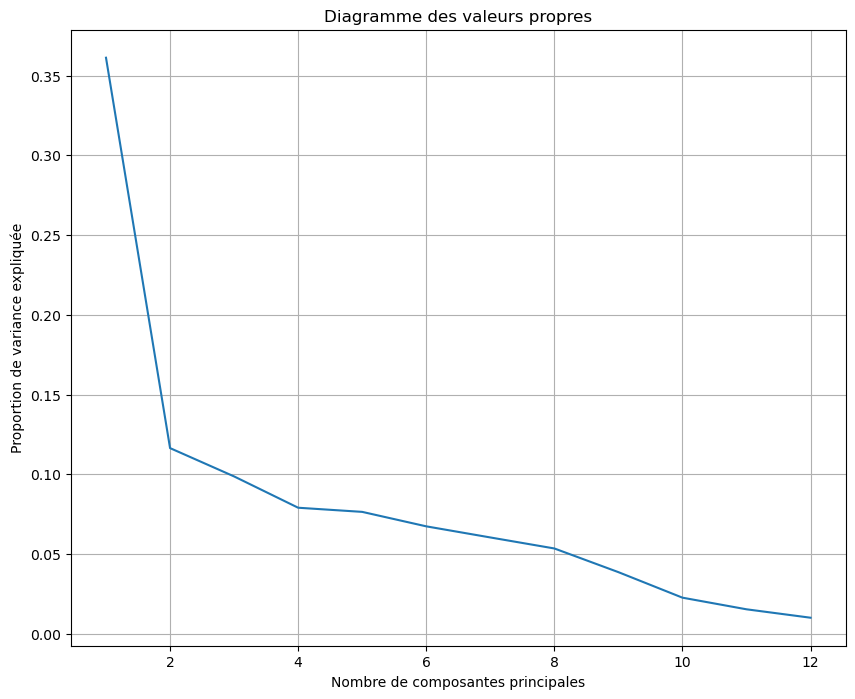

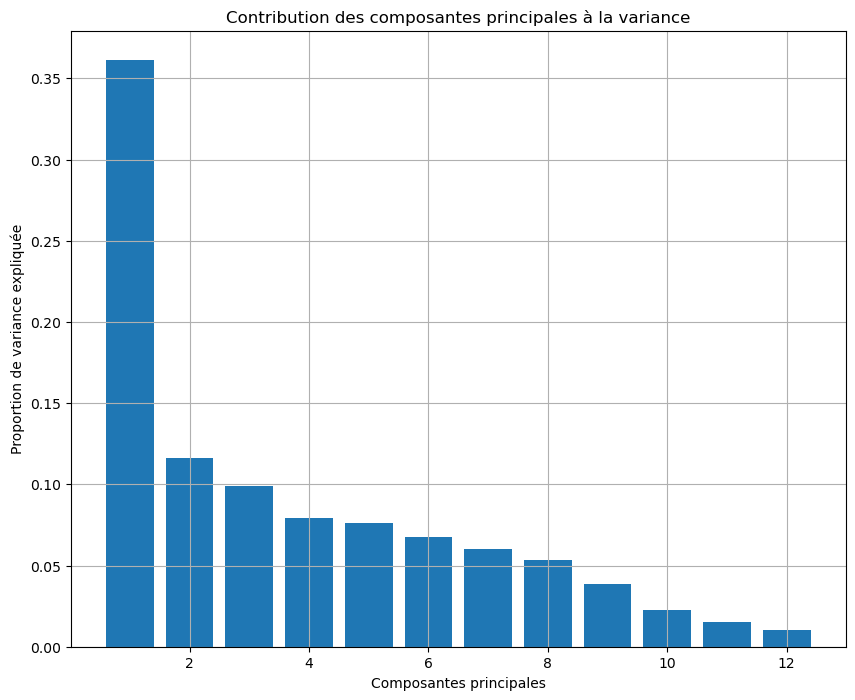

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Charger les donn√©es transform√©es
df_transformed = pd.read_csv("education_economics_indicators_transformed.csv")

# Filtrer uniquement les colonnes num√©riques
df_numeric = df_transformed.select_dtypes(include=['float64', 'int64'])

# Appliquer l'ACP
pca = PCA(n_components=len(df_numeric.columns))
pca.fit(df_numeric)

# Extraire les valeurs propres (explained_variance_) et les vecteurs propres (components_)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Arrondir les valeurs propres et les vecteurs propres
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

# Afficher les r√©sultats
print("Valeurs propres :", eigenvalues_rounded)
print("Vecteurs propres :\n", eigenvectors_rounded)

# Tracer le diagramme des valeurs propres (proportion de variance expliqu√©e)
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliqu√©e')
plt.title('Diagramme des valeurs propres')
plt.grid()
plt.show()

# Tracer la contribution de chaque composante principale aux variances
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Composantes principales')
plt.ylabel('Proportion de variance expliqu√©e')
plt.title('Contribution des composantes principales √† la variance')
plt.grid(True)
plt.show()


Ce diagramme des valeurs propres, √©galement appel√© scree plot, illustre la proportion de variance expliqu√©e par chaque composante principale dans le cadre d‚Äôune analyse en composantes principales (ACP). La premi√®re composante principale capture une proportion significative de la variance (~35 %), ce qui montre qu‚Äôelle contient l‚Äôessentiel de l‚Äôinformation des donn√©es. Une diminution rapide des valeurs propres est visible apr√®s les premi√®res composantes (effet "coude"), indiquant que les 2 ou 3 premi√®res composantes suffisent √† repr√©senter efficacement les donn√©es. Au-del√† de la quatri√®me composante, la variance expliqu√©e devient n√©gligeable, ce qui sugg√®re que ces composantes contiennent peu d‚Äôinformations pertinentes. Ainsi, cette analyse permet de r√©duire la dimensionnalit√© tout en conservant une bonne partie de la structure des donn√©es

#### Cercle de corr√©lation

Le graphique montre un cercle de corr√©lation en 3D, qui est une repr√©sentation des relations entre les variables originales et les trois composantes principales

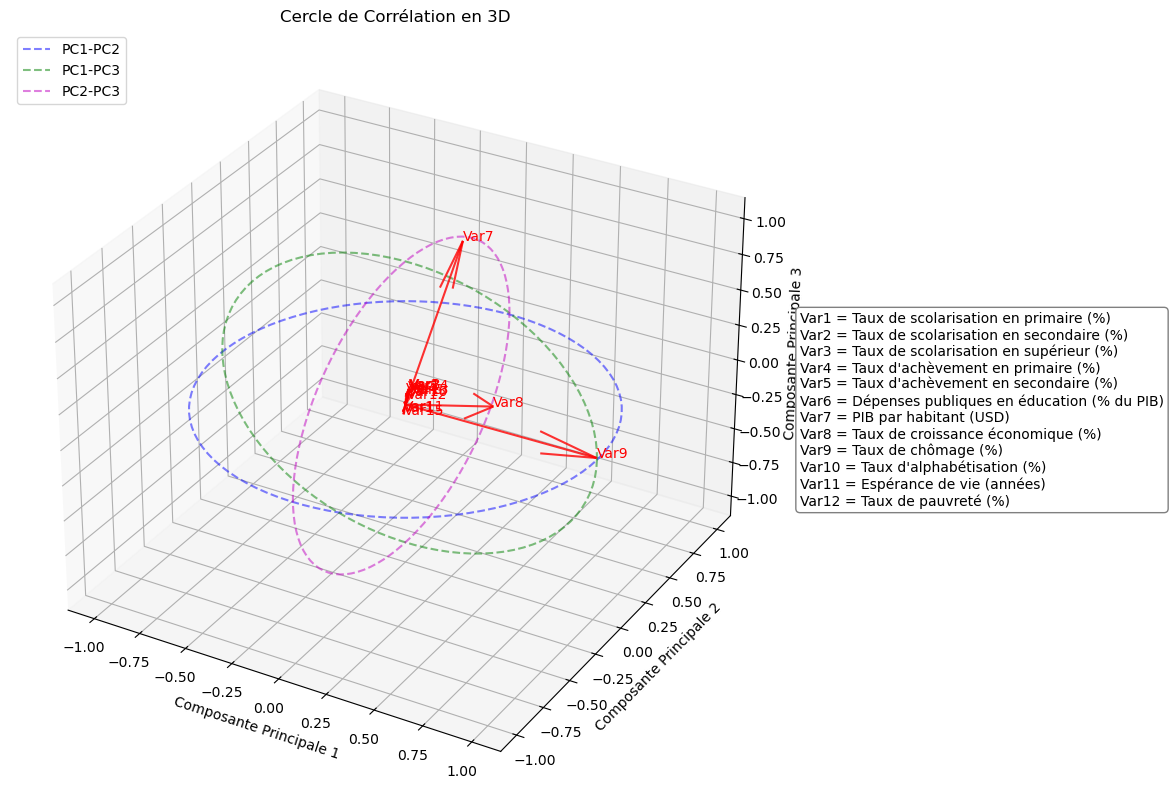

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Charger les donn√©es transform√©es
df_transformed = pd.read_csv("education_economics_indicators_transformed.csv")

# S√©lectionner les colonnes num√©riques pour l'ACP
df_numeric = df_transformed.select_dtypes(include=['float64', 'int64'])

# Appliquer l'ACP
pca = PCA(n_components=3)  # Limit√© √† 3 composantes principales pour la visualisation 3D
pca.fit(df_numeric)

# Extraire les composantes principales
components = pca.components_

# Noms des variables
variable_names = [
    'Taux de scolarisation en primaire (%)', 
    'Taux de scolarisation en secondaire (%)',
    'Taux de scolarisation en sup√©rieur (%)', 
    'Taux d\'ach√®vement en primaire (%)',
    'Taux d\'ach√®vement en secondaire (%)', 
    'D√©penses publiques en √©ducation (% du PIB)',
    'PIB par habitant (USD)', 
    'Taux de croissance √©conomique (%)', 
    'Taux de ch√¥mage (%)',
    'Taux d\'alphab√©tisation (%)', 
    'Esp√©rance de vie (ann√©es)', 
    'Taux de pauvret√© (%)'
]

# Cr√©ation de la figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Tracer les fl√®ches pour les variables
for i, (x, y, z) in enumerate(components.T):
    ax.quiver(0, 0, 0, x, y, z, color='r', alpha=0.8)
    ax.text(x, y, z, f"Var{i+1}", color='r')

# Tracer les cercles projet√©s sur les plans PC1-PC2, PC1-PC3, et PC2-PC3
theta = np.linspace(0, 2 * np.pi, 100)
circle_xy = np.array([np.cos(theta), np.sin(theta), np.zeros_like(theta)])  # Plan PC1-PC2
circle_xz = np.array([np.cos(theta), np.zeros_like(theta), np.sin(theta)])  # Plan PC1-PC3
circle_yz = np.array([np.zeros_like(theta), np.cos(theta), np.sin(theta)])  # Plan PC2-PC3

# Ajouter les cercles au graphique
ax.plot(circle_xy[0], circle_xy[1], circle_xy[2], 'b--', alpha=0.5, label='PC1-PC2')
ax.plot(circle_xz[0], circle_xz[1], circle_xz[2], 'g--', alpha=0.5, label='PC1-PC3')
ax.plot(circle_yz[0], circle_yz[1], circle_yz[2], 'm--', alpha=0.5, label='PC2-PC3')

# Ajuster les limites
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])

# Ajouter des labels et un titre
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
ax.set_title('Cercle de Corr√©lation en 3D')

# Cr√©er une l√©gende descriptive √† droite
legend_labels = [f"Var{i+1} = {name}" for i, name in enumerate(variable_names)]
legend_text = "\n".join(legend_labels)

# Ajouter un texte hors du graphique pour la l√©gende descriptive
plt.figtext(0.85, 0.5, legend_text, fontsize=10, color='black', ha='left', va='center', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

# Afficher la l√©gende des cercles
ax.legend(loc='upper left')

plt.show()


Ce graphique, tir√© d'une Analyse en Composantes Principales (ACP), r√©v√®le que les variables Var7 (PIB par habitant) et Var9 (Taux de ch√¥mage) sont ind√©pendantes, comme le montre l'orientation presque orthogonale de leurs vecteurs. En revanche, Var8 (Taux de croissance √©conomique) et Var7 sont positivement corr√©l√©es, t√©moignant d‚Äôune relation directe entre ces deux indicateurs. Les autres variables, principalement li√©es √† l‚Äô√©ducation et aux d√©penses publiques (Var1 √† Var6), sont regroup√©es pr√®s de l'origine, sugg√©rant une contribution similaire et faible aux composantes principales. Cela indique une interd√©pendance √©troite entre ces facteurs, mais un impact moindre sur la structuration globale des donn√©es

#### R√©gression polynomiale

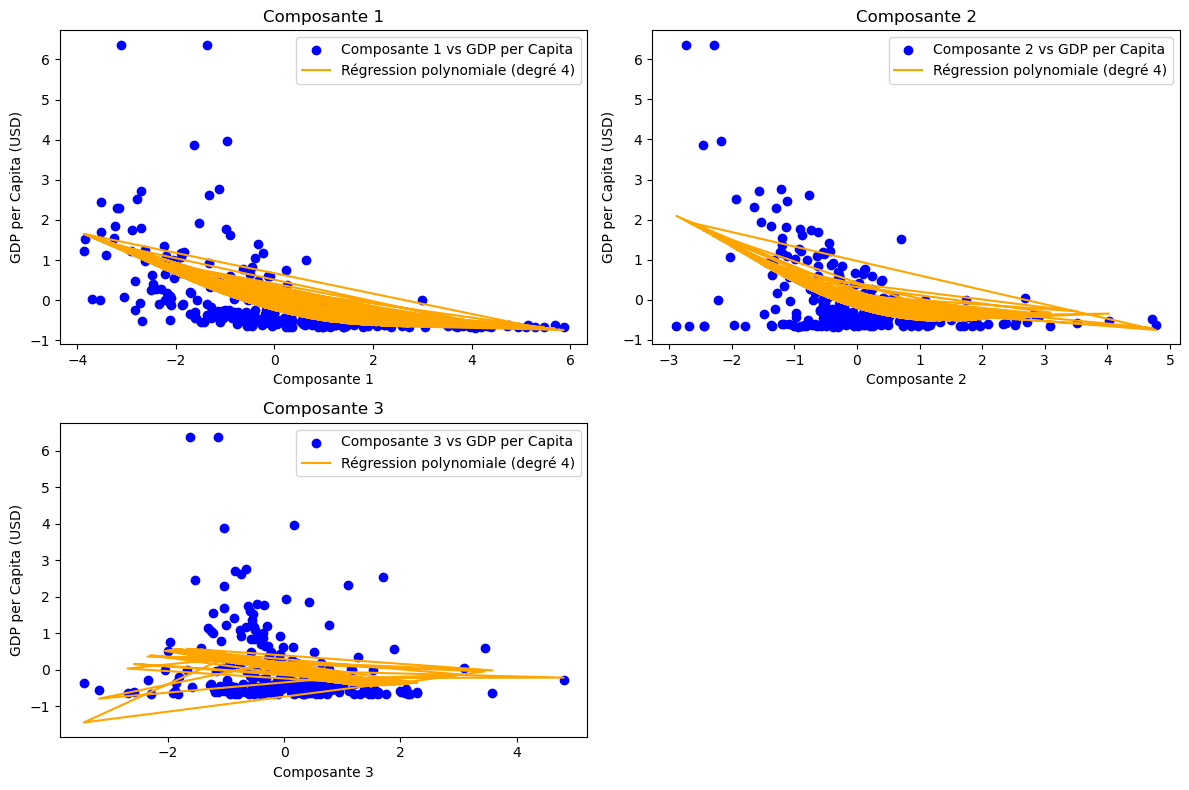

√âvaluation du mod√®le pour chaque composante :
Composante 1: MSE = 0.66, R¬≤ = 0.34
Composante 2: MSE = 0.73, R¬≤ = 0.27
Composante 3: MSE = 0.90, R¬≤ = 0.10


In [230]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Nombre de composantes principales √† visualiser (3 dans cet exemple)
num_components = 3

# Stockage des m√©triques pour analyse
mse_values = []  # Erreur quadratique moyenne
r2_values = []   # Coefficient de d√©termination

# Cr√©ation des graphiques
plt.figure(figsize=(12, 8))
for i in range(num_components):
    # S√©lection de la composante principale (i+1)
    X_component = X_pca[:, i].reshape(-1, 1)  # Composante i+1
    
    # Transformation polynomiale (degr√© 4)
    poly = PolynomialFeatures(degree=4)
    X_poly = poly.fit_transform(X_component)
    
    # R√©gression polynomiale
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, gdp_per_capita)
    
    # Pr√©dictions
    gdp_poly_pred = poly_reg.predict(X_poly)
    
    # √âvaluation du mod√®le
    mse = mean_squared_error(gdp_per_capita, gdp_poly_pred)
    r2 = r2_score(gdp_per_capita, gdp_poly_pred)
    mse_values.append(mse)
    r2_values.append(r2)
    
    # Trac√©
    plt.subplot(2, 2, i + 1)  # Organise les graphiques en une grille 2x2
    plt.scatter(X_component, gdp_per_capita, color='blue', label=f'Composante {i+1} vs GDP per Capita')
    plt.plot(X_component, gdp_poly_pred, color='orange', label='R√©gression polynomiale (degr√© 4)')
    plt.title(f'Composante {i+1}')
    plt.xlabel(f'Composante {i+1}')
    plt.ylabel('GDP per Capita (USD)')
    plt.legend()

# Ajuste l'espacement entre les graphiques
plt.tight_layout()
plt.show()

# Affichage des m√©triques globales
print("√âvaluation du mod√®le pour chaque composante :")
for i in range(num_components):
    print(f"Composante {i+1}: MSE = {mse_values[i]:.2f}, R¬≤ = {r2_values[i]:.2f}")


#### Int√©rpr√©tation 
Composante 1 :

Relation mod√©r√©e avec le PIB (ùëÖ^2=0.34).
Le mod√®le capture une tendance d√©croissante, mais les oscillations indiquent un ajustement parfois excessif.
MSE raisonnable (0.66), montrant un bon ajustement global.

Composante 2 :

Relation faible avec le PIB (ùëÖ2=0.27).
La courbe montre une tendance d√©croissante, mais les donn√©es sont plus dispers√©es, r√©duisant la pr√©cision.
MSE l√©g√®rement plus √©lev√© (0.73).

Composante 3 :

Aucune relation significative avec le PIB (ùëÖ2=0.10).
La courbe oscille fortement et ne suit pas une tendance claire.
MSE √©lev√© (0.90), confirmant un mauvais ajustement.
    
Conclusion :
La Composante 1 est la plus importante pour expliquer la variabilit√© du PIB par habitant.
La Composante 2 a un r√¥le secondaire.
La Composante 3 n'a pratiquement aucune influence sur le PIB, et le mod√®le polynomiale est inutile pour cette relation.